#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math
from math import exp
import statistics as stats
import statsmodels.api as sm

#### Chapter 7 Ex 2

OXYCON = w[0] + w[1] × AGE + w[2] × HEARTRATE

Given w[0]= −59.50, w[1] = −0.15, and w[2] = 0.60,

### a. make a prediction for each training instance using this model.

In [2]:
OxyCon=[37.99,47.34,44.38,28.17,27.07,37.85,44.72,36.42,31.21,54.85,39.84,30.83]
df=pd.DataFrame(OxyCon,columns=['OxyCon'])

In [3]:
age_array=[41,42,37,46,48,44,43,46,37,38,43,43]
df['Age'] = age_array

In [4]:
Heartrate=[138,153,151,133,126,145,158,143,138,158,143,138]
df['HeartRate'] = Heartrate

In [5]:
Prediction=[]
w_0= -59.50
w_1= -0.15
w_2= 0.60

for x,y in zip(df['Age'],df['HeartRate']): #zipping age and heartrate array and predicting the values
    p = w_0 + w_1 * x + w_2 * y
    Prediction.append(p)

df['Prediction']=Prediction

In [6]:
df.head()

,OxyCon,Age,HeartRate,Prediction
0,37.99,41,138,17.15
1,47.34,42,153,26.00
2,44.38,37,151,25.55
3,28.17,46,133,13.40
4,27.07,48,126,8.90


### b. Calculate the sum of squared errors for the set of predictions generated in part (a).

We must first determine the error rate, square it, add it all up, and then divide it by two to determine the sum of squared errors.

In [7]:
Err=[]
for i,j in zip(df['OxyCon'],df['Prediction']):
    error= i-j
    Err.append(error)
df['Error']=Err
Squarederror=[] #finding error between OxyCon and Prediction column

In [8]:
for a in df['Error']:
    sq_error= a**2
    Squarederror.append(sq_error)
df['SquaredError']=Squarederror#finding the squared error

In [9]:
sum_sqe=0
for b in df['SquaredError']:
    sum_sqe +=b
Final_sqe=sum_sqe/2
print('Sum of squared errors',round(sum_sqe,4))
print('Sum of squared errors/2',round(Final_sqe,4))

Sum of squared errors 4035.1863
Sum of squared errors/2 2017.5932


### c. Assuming a learning rate of 0.000002, calculate the weights at the next iteration of the gradient descent algorithm.

In the question, it was asked to assume learning rate as 0.000002

We need to first calculate Error delta for three weights given 

W[0] =-59.50 d[0] = 1

W[1] = -0.15 d[1] = Age

W[2] = 0.60 d[2]=Heart Rate

Error Delta = Error*d[i]


In [10]:
ED_W0=df['Error'] * 1
df['errorDelta_W0']=ED_W0 #for d[0]

In [11]:
ED_W1=[]
for i,j in zip(df['Age'],df['Error']):
    EDW1 = i * j
    ED_W1.append(EDW1)
df['errorDelta_W1']=ED_W1 #for d[1]

In [12]:
ED_W2=[]
for i,j in zip(df['HeartRate'],df['Error']):
    EDW2 = i * j
    ED_W2.append(EDW2)
df['errorDelta_W2']=ED_W2 #for d[2]

In [13]:
df.head()

,OxyCon,Age,HeartRate,Prediction,Error,SquaredError,errorDelta_W0,errorDelta_W1,errorDelta_W2
0,37.99,41,138,17.15,20.84,434.3056,20.84,854.44,2875.92
1,47.34,42,153,26.00,21.34,455.3956,21.34,896.28,3265.02
2,44.38,37,151,25.55,18.83,354.5689,18.83,696.71,2843.33
3,28.17,46,133,13.40,14.77,218.1529,14.77,679.42,1964.41
4,27.07,48,126,8.90,18.17,330.1489,18.17,872.16,2289.42


In [14]:
sum_Error_Delta_W0=np.sum(df['errorDelta_W0'])
sum_Error_Delta_W1=np.sum(df['errorDelta_W1'])
sum_Error_Delta_W2=np.sum(df['errorDelta_W2'])

In [15]:
print('Sum of Error delta W1 ',round(sum_Error_Delta_W0,4))
print('Sum of Error delta W2 ',round(sum_Error_Delta_W1,4))
print('Sum of Error delta W3 ',round(sum_Error_Delta_W2,4))

Sum of Error delta W1  216.47
Sum of Error delta W2  9128.37
Sum of Error delta W3  31271.96


So the updated weights will be given by
W[i] = w[i] +learningrate *ErrorDelta(w[i]) i in [0,1,2]

In [16]:
W_0_N = -59.50 + 0.000002*216.48
W_1_N = -0.15+0.000002*9128.37
W_2_N=0.60+0.000002*31273.96

In [17]:
print('Updated Weight for W[0]',round(W_0_N,4))
print('Updated Weight for W[1]',round(W_1_N,4))
print('Updated Weight for W[2]',round(W_2_N,4))

Updated Weight for W[0] -59.4996
Updated Weight for W[1] -0.1317
Updated Weight for W[2] 0.6625


### d. Calculate the sum of squared errors for a set of predictions generated using the new set of weights calculated in part (c).

In [18]:
prediction=[]
for i,j in zip(df['Age'],df['HeartRate']):
    p = W_0_N + W_1_N * i + W_2_N * j
    prediction.append(p)

In [19]:
df1=pd.DataFrame(OxyCon,columns=['OxyCon'])
df1['prediction']= prediction
Error=[]
for i,j in zip(df1['OxyCon'],df1['prediction']):
    error= i-j
    Error.append(error)
df1['Error']=Error


In [20]:
SQE=[]
for a in df1['Error']:
    sqe= a * a
    SQE.append(sqe)
df1['Squared_Error']=SQE

In [21]:
df1.head()

,OxyCon,prediction,Error,Squared_Error
0,37.99,26.530572,11.459428,131.318484
1,47.34,36.337048,11.002952,121.064957
2,44.38,35.670668,8.709332,75.852459
3,28.17,22.559116,5.610884,31.482015
4,27.07,17.657794,9.412206,88.589614


In [22]:
sum_sqe_N=0
for b in df1['Squared_Error']:
    sum_sqe_N +=b
Final_sqe=sum_sqe_N/2
print('Sum of squared errors',round(sum_sqe_N,4))
print('Sum of squared errors/2',round(Final_sqe,4))

Sum of squared errors 936.4386
Sum of squared errors/2 468.2193


#### Chapter 7 Exercise 3

To predict the value of logistic regression model we use the formula Logistic (w.d) where logistic function = 1/1+e^ (w.d)

Given weights 

Intercept w [0] = -3.82398

W [1] =-0.02990

SOCIOECONOMIC BAND A = 0

SOCIOECONOMIC BAND B =-0.09089

SOCIOECONOMIC BAND C= -0.19558

SHOP VALUE =0.02999

SHOP FREQUENCY =0.74572

Considering the classification rate as 0.5


In [23]:
def sigmoid(x):
  return 1 / (1 + exp(-x))

In [24]:
Logistic_1 = -3.82398-0.0299*56-0.09089*1-0.19558*0+0.745720*1.6+0.02999*109.32

Logistic_2 = -3.82398-0.0299*21-0.09089*0-0.19558*1+0.745720*4.92+0.02999*11.28

Logistic_3 = -3.82398-0.0299*48-0.09089*1-0.19558*0+0.745720*1.21+0.02999*161.19

Logistic_4 = -3.82398-0.0299*37-0.19558+0.72*0.745720+0.02999*170.65

Logistic_5 = -3.82398-32*0.0299+1.08*0.745720+0.02999*165.39

In [25]:
print('Logistic Regression for ID_1',round(sigmoid(Logistic_1),2))
print('Logistic Regression for ID_2',round(sigmoid(Logistic_2),2))
print('Logistic Regression for ID_3',round(sigmoid(Logistic_3),2))
print('Logistic Regression for ID_4',round(sigmoid(Logistic_4),2))
print('Logistic Regression for ID_5',round(sigmoid(Logistic_5),2))

Logistic Regression for ID_1 0.25
Logistic Regression for ID_2 0.35
Logistic Regression for ID_3 0.6
Logistic Regression for ID_4 0.63
Logistic Regression for ID_5 0.73


In [26]:
print('Logistic Regression for ID_1= 0.25, No as the value is below classification rate')
print('Logistic Regression for ID_2= 0.35, No as the value is below classification rate')
print('Logistic Regression for ID_3= 0.60, Yes as the value is above classification rate')
print('Logistic Regression for ID_4= 0.63, Yes as the value is above classification rate')
print('Logistic Regression for ID_5= 0.73, Yes as the value is above classification rate')

Logistic Regression for ID_1= 0.25, No as the value is below classification rate
Logistic Regression for ID_2= 0.35, No as the value is below classification rate
Logistic Regression for ID_3= 0.60, Yes as the value is above classification rate
Logistic Regression for ID_4= 0.63, Yes as the value is above classification rate
Logistic Regression for ID_5= 0.73, Yes as the value is above classification rate


#### Chapter 7 Ex 4

### 7.4.a. Using the support vector 〈d[1], d[2]〉 and the query instance 〈q[1], q[2]〉 as examples, show that applying a polynomial kernel with p = 2, kernel(d, q) = (d · q + 1)2, is equivalent to calculating the dot product of the support vector and query instance after applying the following set of basis functions

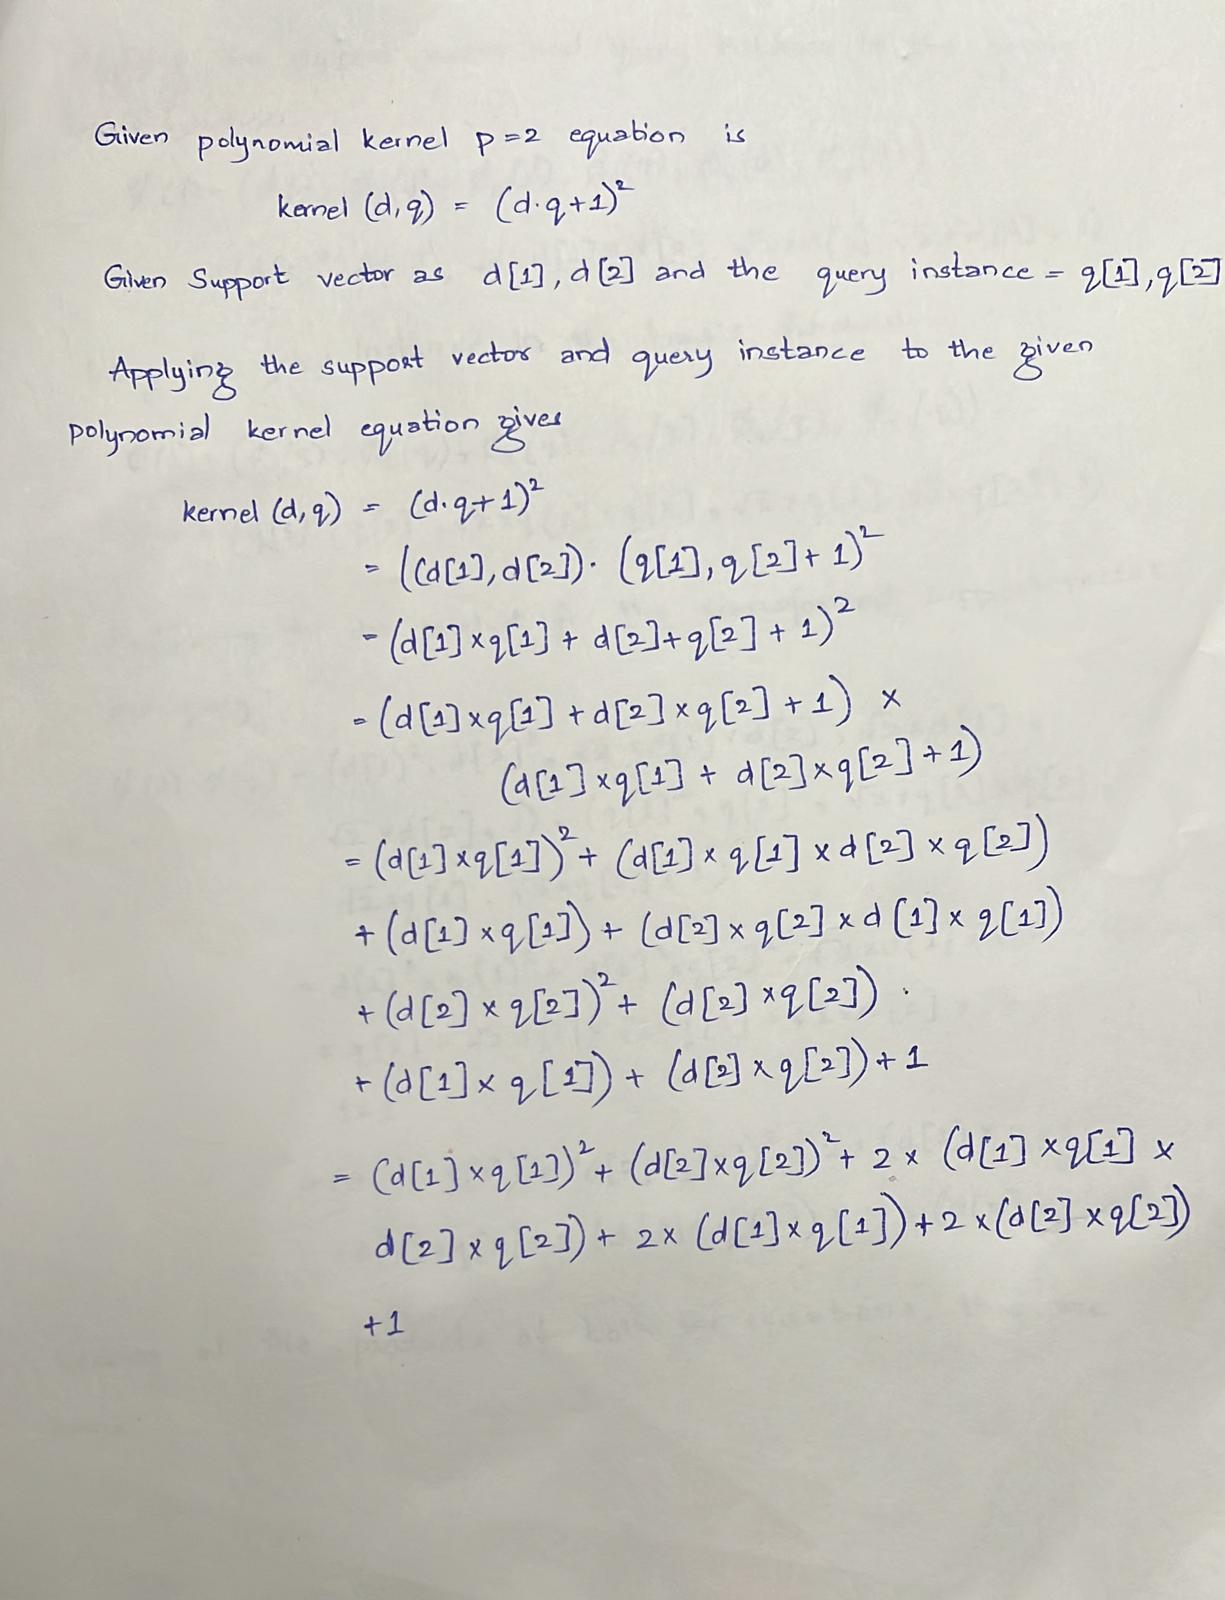

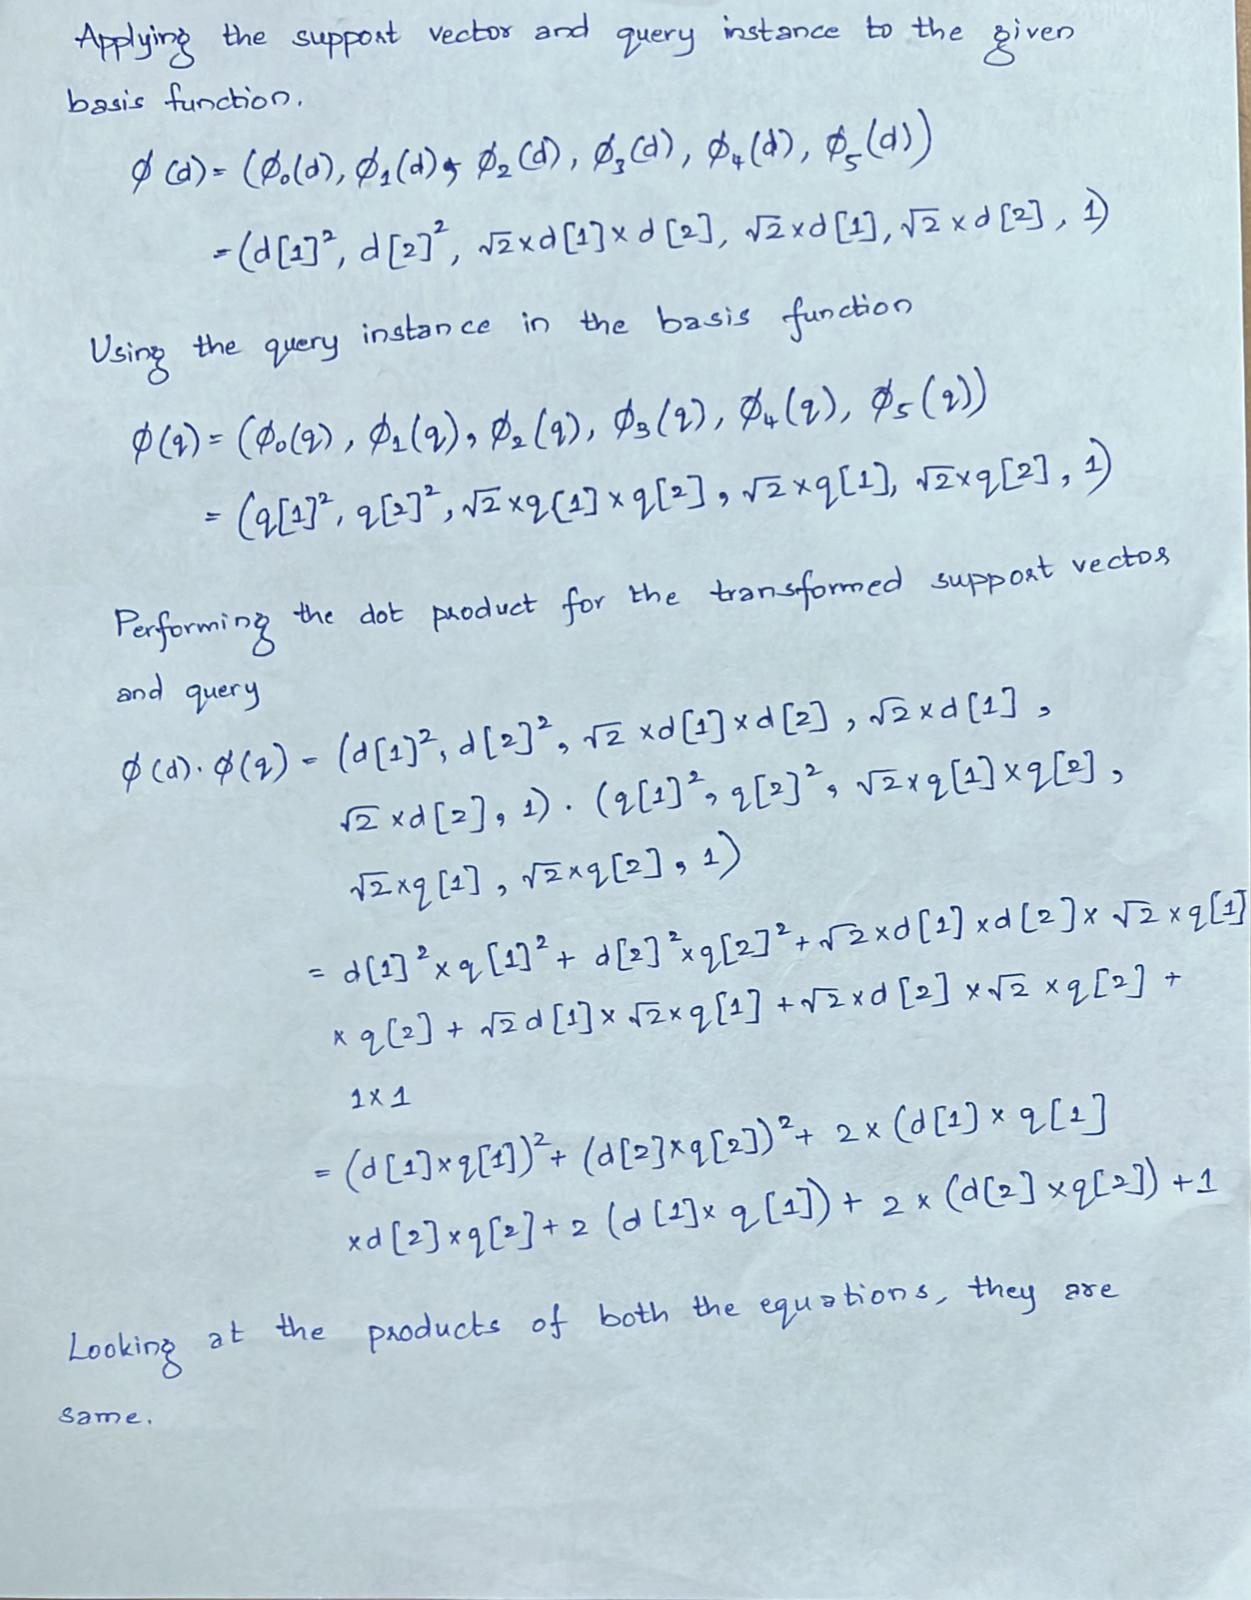

### 7.4.b.i Using the version of the support vector machine prediction model that uses basis functions (see Equation 7.46) with the basis functions given in part (a), calculate the output of the model for a query instance with DOSE1 = 0.90 and DOSE2 = −0.90.

In [27]:
w0=0.3074
a=[7.1655,6.9060,2.0033,6.1144,5.9538]
q=[0.81,0.81,-1.1453,1.2727,-1.2727,1]
d1=[0.0553,0.1613,0.1335,0.3325,0.5679,1.0]
d2=[0.0311,0.0367,0.0478,-0.2495,-0.2710,1.0]
d3=[0.0935,0.8825,-0.4061,0.4323,-1.3285,1.0]
d4=[0.3125,0.4036,0.5022,0.7905,0.8984,1.0]
d5=[0.4356,0.0138,0.1097,-0.9334,-0.1662,1.0]

In [28]:
m1=(1 * a[0] * ((d1[0]*q[0])+(d1[1]*q[1])+(d1[2]*q[2])+(d1[3]*q[3])+(d1[4]*q[4])+(d1[5]*q[5])) + w0)
m2=(1*a[1]*((d2[0]*q[0])+(d2[1]*q[1])+(d2[2]*q[2])+(d2[3]*q[3])+(d2[4]*q[4])+(d2[5]*q[5]))+w0)
m3=(-1*a[2]*((d3[0]*q[0])+(d3[1]*q[1])+(d3[2]*q[2])+(d3[3]*q[3])+(d3[4]*q[4])+(d3[5]*q[5]))+w0)
m4=(-1*a[3]*((d4[0]*q[0])+(d4[1]*q[1])+(d4[2]*q[2])+(d4[3]*q[3])+(d4[4]*q[4])+(d4[5]*q[5]))+w0)
m5=(-1*a[4]*((d5[0]*q[0])+(d5[1]*q[1])+(d5[2]*q[2])+(d5[3]*q[3])+(d5[4]*q[4])+(d5[5]*q[5]))+w0)

In [29]:
print(round(m1,4))
print(round(m2,4))
print(round(m3,4))
print(round(m4,4))
print(round(m5,4))

5.4877
7.4036
-8.7007
-4.9971
-1.2523


In [30]:
s=m1+m2+m3+m4+m5
s

-2.0587989713859987

Since the output is negative as shown in the above cell,  the model makes a prediction of the **negative level—safe.**

### 7.4.b.ii Using the version of the support vector machine prediction model that uses a kernel function (see Equation 7.47) with the polynomial kernel function, calculate the output of the model for a query instance with DOSE1 = 0.22 and DOSE2 = 0.16.

In [31]:
dose1=0.22
dose2=-0.16

q1_dose1=0.2351
q1_dose2=0.4016

q2_dose1=-0.1764
q2_dose2=-0.1916

q3_dose1=0.3057
q3_dose2=-0.9394

q4_dose1=0.5590
q4_dose2=0.6353

q5_dose1=-0.6600
q5_dose2=-0.1175

In [32]:
km_1=(1 * a[0] * ((dose1*q1_dose1) + (dose2*q1_dose2)+ 1)**2 +w0)

km_2=(1 * a[1] * ((dose1*q2_dose1) + (dose2*q2_dose2)+ 1)**2 +w0)

km_3=(-1 * a[2] * ((dose1*q3_dose1) + (dose2*q3_dose2)+ 1)**2 +w0)

km_4=(-1 * a[3] * ((dose1*q4_dose1) + (dose2*q4_dose2)+ 1)**2 +w0)

km_5=(-1 * a[4] * ((dose1*q5_dose1) + (dose2*q5_dose2)+ 1)**2 +w0)

In [33]:
print(km_1)
print(km_2)
print(km_3)
print(km_4)
print(km_5)

7.294400954333318
7.101263514948224
-2.6623870434231005
-6.070647145147224
-4.2364029844480005


In [34]:
s=km_1+km_2+km_3+km_4+km_5
s

1.4262272962632165

Because the output of the model is positive, the model predicts the **positive level—dangerous.**


### 7.4.b.iii Verify that the answers calculated in parts (i) and (ii) of this question would have been the same if the alternative approach (basis functions or the polynomial kernel function) had been used in each case.

In [35]:
dose1=0.90
dose2=-0.90

q1_dose1=0.2351
q1_dose2=0.4016

q2_dose1=-0.1764
q2_dose2=-0.1916

q3_dose1=0.3057
q3_dose2=-0.9394

q4_dose1=0.5590
q4_dose2=0.6353

q5_dose1=-0.6600
q5_dose2=-0.1175


In [36]:
km_1=(1 * a[0] * ((dose1*q1_dose1) + (dose2*q1_dose2)+ 1)**2 +w0)

km_2=(1 * a[1] * ((dose1*q2_dose1) + (dose2*q2_dose2)+ 1)**2 +w0)

km_3=(-1 * a[2] * ((dose1*q3_dose1) + (dose2*q3_dose2)+ 1)**2 +w0)

km_4=(-1 * a[3] * ((dose1*q4_dose1) + (dose2*q4_dose2)+ 1)**2 +w0)

km_5=(-1 * a[4] * ((dose1*q5_dose1) + (dose2*q5_dose2)+ 1)**2 +w0)

In [37]:
print(km_1)
print(km_2)
print(km_3)
print(km_4)
print(km_5)

5.48630111372375
7.403640565414398
-8.70124367262873
-4.996081178482161
-1.2518291465124993


In [38]:
s=km_1+km_2+km_3+km_4+km_5
s

-2.0592123184852427

Since the output is negative as shown in the above cell,  the model makes a prediction of the **negative level—safe.**

In [39]:
Dose1=0.22
Dose2=0.16

In [40]:
km_1=(1 * a[0] * (((Dose1*q1_dose1)**2) + 2 * (Dose1*q1_dose1)*(Dose2*q1_dose2) 
                 + 2 * (Dose2*q1_dose2)*(Dose2*q1_dose2) + 2*(Dose1*q1_dose1)+2*(Dose2*q1_dose2) +1) +w0)
km_2=(1 * a[1] * (((Dose1*q2_dose1)**2) + 2 * (Dose1*q2_dose1)*(Dose2*q2_dose2) 
                 + 2 * (Dose2*q2_dose2)**2 + 2*(Dose1*q2_dose1)+2*(Dose2*q2_dose2) +1) +w0)
km_3=(-1 * a[2] * (((Dose1*q3_dose1)**2) + 2 * (Dose1*q3_dose1)*(Dose2*q3_dose2) 
                 + 2 * (Dose2*q3_dose2)**2 + 2*(Dose1*q3_dose1)+2*(Dose2*q3_dose2) +1) +w0)
km_4=(-1 * a[3] * (((Dose1*q4_dose1)**2) + 2 * (Dose1*q4_dose1)*(Dose2*q4_dose2) 
                 + 2 * (Dose2*q4_dose2)**2 + 2*(Dose1*q4_dose1)+2*(Dose2*q4_dose2) +1) +w0)
km_5=(-1 * a[4] * (((Dose1*q5_dose1)**2) + 2 * (Dose1*q5_dose1)*(Dose2*q5_dose2) 
                 + 2 * (Dose2*q5_dose2)**2 + 2*(Dose1*q5_dose1)+2*(Dose2*q5_dose2) +1) +w0)

In [41]:
print(km_1)
print(km_2)
print(km_3)
print(km_4)
print(km_5)

9.26094827345831
6.2937765818865925
-1.4222263721952229
-8.925625594338547
-3.855791315872


In [42]:
s=km_1+km_2+km_3+km_4+km_5
s

1.351081572939132

Because the output of the model is positive, the model predicts the **positive level—dangerous.**

### 7.4.b.iv. Compare the amount of computation required to calculate the outputof the support vector machine using the polynomial kernel function with the amount required to calculate the output of the support vector machine using the basis functions.

The computation using the polynomial kernel function is clearly considerably ***more efficient*** than the calculation using the basis function transformation, even in this little case. It is much more computationally intensive to transform using the basis functions and calculate the dot product in this higher dimensional space than it is to calculate the polynomial kernel function. The benefit of the kernel technique is this.

### Chapter 8 Ex 2

### 8.a. Based on these predictions, calculate the evaluation measures listed below for each model.

In [43]:
Target=[2623,2423,2423,2448,2762,2435,2519,2772,2601,2422,2349,2515,2548,2281,2295,2570,2528,2342,2456,2451,2296,2405,2389,2629,
       2584,2658,2482,2471,2605,2442]

Model1_Pred=[2664,2436,2399,2447,2847,2411,2516,2870,2586,2414,2407,2505,2581,2277,2280,2577,2510,2381,2452,2437,2307,2355,
                   2418,2582,2564,2662,2492,2478,2620,2445]


In [44]:
data=pd.DataFrame(Target,columns=['Target'])
data['Model1_Pred'] = Model1_Pred

In [45]:
Err=[]
for x,y in zip(data['Model1_Pred'],data['Target']):
    err= x-y
    Err.append(err)
data['Error']=Err

In [46]:
Sqerror=[]
for i in data['Error']:
    sq_error= i * i
    Sqerror.append(sq_error)
data['Squared_Error']=Sqerror

In [47]:
abs_error=[]
for k in data['Error']:
    abs_err= abs(k)
    abs_error.append(abs_err)
data['ABS_Error']=abs_error

In [48]:
data.head()

,Target,Model1_Pred,Error,Squared_Error,ABS_Error
0,2623,2664,41,1681,41
1,2423,2436,13,169,13
2,2423,2399,-24,576,24
3,2448,2447,-1,1,1
4,2762,2847,85,7225,85


In [49]:
Tgt_mean=np.mean(data['Target'])
Tgt_std=stats.stdev(data['Target'])
mdl1_pred_mean=np.mean(data['Model1_Pred'])
mdl1_pred_std=stats.stdev(data['Model1_Pred'])

In [50]:
print('Target mean is',round(Tgt_mean,4))
print('Target standerd deviation is',round(Tgt_std,4))
print('Model1_pred  mean is',round(mdl1_pred_mean,4))
print('Model1_pred standerd deviation is',round(mdl1_pred_std,4))

Target mean is 2490.8
Target standerd deviation is 127.0526
Model1_pred  mean is 2497.3333
Model1_pred standerd deviation is 141.8995


In [51]:
SST_list=[]
for x in data['Model1_Pred']:
    sst= x-mdl1_pred_mean
    SST_list.append(sst)
data['SST']=SST_list

In [52]:
SquaredSST_list=[]
for y in data['SST']:
    Square_SST= y * y
    SquaredSST_list.append(Square_SST)
data['Squared_SST']=SquaredSST_list

In [53]:
data.head()

,Target,Model1_Pred,Error,Squared_Error,ABS_Error,SST,Squared_SST
0,2623,2664,41,1681,41,166.666667,27777.777778
1,2423,2436,13,169,13,-61.333333,3761.777778
2,2423,2399,-24,576,24,-98.333333,9669.444444
3,2448,2447,-1,1,1,-50.333333,2533.444444
4,2762,2847,85,7225,85,349.666667,122266.777778


In [54]:
sum_sqe_sst=0
for j in data['Squared_SST']:
    sum_sqe_sst +=j
final_sqe_model1=sum_sqe_sst/2
print('Sum of squared SST is',round(final_sqe_model1,4))

Sum of squared SST is 291964.3333


In [55]:
Error_mean=np.mean(data['Error'])
Error_stdev=stats.stdev(data['Error'])

In [56]:
Error_square_mean=np.mean(data['Squared_Error'])
Error_square_stdev=stats.stdev(data['Squared_Error'])

In [57]:
abs_Error_mean=np.mean(data['ABS_Error'])
abs_Error_stdev=stats.stdev(data['ABS_Error'])

In [58]:
SST_mean=np.mean(data['SST'])
SST_stdev=stats.stdev(data['SST'])

In [59]:
Squared_SST_mean=np.mean(data['Squared_SST'])
Squared_SST_stdev=stats.stdev(data['Squared_SST'])

In [60]:
print('Error  Mean is                      :',round(Error_mean,4))
print('Error Standerd Deviation is         :',round(Error_stdev,4))
print('Squared Error Mean is               :',round(Error_square_mean,4))
print('Squared Error Standerd Deviation is :',round(Error_square_stdev,4))
print('Absolute Error Mean is              :',round(abs_Error_mean,4))
print('Absolute Error Standerd Deviation is:',round(abs_Error_stdev,4))
print('SST  Mean is                        :',SST_mean)
print('SST Standerd Deviation is           :',round(SST_stdev,4))
print('Squared SST  Mean is                :',round(Squared_SST_mean,4))
print('Squared SST Standerd Deviation is   :',round(Squared_SST_stdev,4))

Error  Mean is                      : 6.5333
Error Standerd Deviation is         : 33.3319
Squared Error Mean is               : 1116.6667
Squared Error Standerd Deviation is : 2179.0502
Absolute Error Mean is              : 23.6667
Absolute Error Standerd Deviation is: 23.9947
SST  Mean is                        : -1.5158245029548803e-13
SST Standerd Deviation is           : 141.8995
Squared SST  Mean is                : 19464.2889
Squared SST Standerd Deviation is   : 33046.3359


In [61]:
sum_sqe_sst=0
for d in data['Squared_SST']:
    sum_sqe_sst +=d
final_sqe_sst_mdl1=sum_sqe_sst/2
print('Sum of Squared SST is',round(final_sqe_sst_mdl1,4))

Sum of Squared SST is 291964.3333


In [62]:
sum_sqe=0
for d in data['Squared_Error']:
    sum_sqe +=d
final_sqe_mdl1=sum_sqe/2

In [63]:
print('Sum of Squared Errors',round(sum_sqe,4))
print('Sum of Squared Errors divided by 2 (sum_sqe/2)',round(final_sqe_mdl1,4))

Sum of Squared Errors 33500
Sum of Squared Errors divided by 2 (sum_sqe/2) 16750.0


In [64]:
Model2_Pred=[2691,2367,2412,2440,2693,2493,2598,2814,2583,2485,2472,2584,2604,2309,2296,2612,2557,2421,2393,2479,2290,2490,
                   2346,2647,2546,2759,2463,2403,2645,2478]

In [65]:
data=pd.DataFrame(Target,columns=['Target'])
data['Model2_Pred'] = Model2_Pred

In [66]:
Err=[]
for x,y in zip(data['Model2_Pred'],data['Target']):
    err= x-y
    Err.append(err)
data['Error']=Err

In [67]:
Sqerror=[]
for i in data['Error']:
    sq_error= i * i
    Sqerror.append(sq_error)
data['Squared_Error']=Sqerror

In [68]:
abs_error=[]
for k in data['Error']:
    abs_err= abs(k)
    abs_error.append(abs_err)
data['ABS_Error']=abs_error

In [69]:
mdl2_pred_mean=np.mean(data['Model2_Pred'])
mdl2_pred_std=stats.stdev(data['Model2_Pred'])

In [70]:
print('Model2_pred  mean is',round(mdl2_pred_mean,4))
print('Model2_pred standerd deviation is',round(mdl2_pred_std,4))

Model2_pred  mean is 2512.3333
Model2_pred standerd deviation is 135.856


In [71]:
SST_list=[]
for x in data['Model2_Pred']:
    sst= x-mdl2_pred_mean
    SST_list.append(sst)
data['SST']=SST_list

In [72]:
SquaredSST_list=[]
for y in data['SST']:
    Square_SST= y * y
    SquaredSST_list.append(Square_SST)
data['Squared_SST']=SquaredSST_list

In [73]:
data.head()

,Target,Model2_Pred,Error,Squared_Error,ABS_Error,SST,Squared_SST
0,2623,2691,68,4624,68,178.666667,31921.777778
1,2423,2367,-56,3136,56,-145.333333,21121.777778
2,2423,2412,-11,121,11,-100.333333,10066.777778
3,2448,2440,-8,64,8,-72.333333,5232.111111
4,2762,2693,-69,4761,69,180.666667,32640.444444


In [74]:
Error_mean=np.mean(data['Error'])
Error_stdev=stats.stdev(data['Error'])

Error_square_mean=np.mean(data['Squared_Error'])
Error_square_stdev=stats.stdev(data['Squared_Error'])

abs_Error_mean=np.mean(data['ABS_Error'])
abs_Error_stdev=stats.stdev(data['ABS_Error'])

SST_mean=np.mean(data['SST'])
SST_stdev=stats.stdev(data['SST'])

Squared_SST_mean=np.mean(data['Squared_SST'])
Squared_SST_stdev=stats.stdev(data['Squared_SST'])

In [75]:
print('Error  Mean is                      :',round(Error_mean,4))
print('Error Standerd Deviation is         :',round(Error_stdev,4))
print('Squared Error Mean is               :',round(Error_square_mean,4))
print('Squared Error Standerd Deviation is :',round(Error_square_stdev,4))
print('Absolute Error Mean is              :',round(abs_Error_mean,4))
print('Absolute Error Standerd Deviation is:',round(abs_Error_stdev,4))
print('SST  Mean is                        :',SST_mean)
print('SST Standerd Deviation is           :',round(SST_stdev,4))
print('Squared SST  Mean is                :',round(Squared_SST_mean,4))
print('Squared SST Standerd Deviation is   :',round(Squared_SST_stdev,4))

Error  Mean is                      : 21.5333
Error Standerd Deviation is         : 52.7935
Squared Error Mean is               : 3157.9333
Squared Error Standerd Deviation is : 3387.2163
Absolute Error Mean is              : 48.1333
Absolute Error Standerd Deviation is: 29.4978
SST  Mean is                        : -1.5158245029548803e-13
SST Standerd Deviation is           : 135.856
Squared SST  Mean is                : 17841.6222
Squared SST Standerd Deviation is   : 21613.7529


In [76]:
sum_sqe_sst=0
for d in data['Squared_SST']:
    sum_sqe_sst +=d
final_sqe_sst_mdl2=sum_sqe_sst/2
print('Sum of Squared SST',round(final_sqe_sst_mdl2,4))

Sum of Squared SST 267624.3333


In [77]:
sum_sqe=0
for d in data['Squared_Error']:
    sum_sqe +=d
final_sqe_mdl2=sum_sqe/2

In [78]:
print('Sum of Squared Errors is',round(sum_sqe,4))
print('Sum of Squared Errors/2 is',round(final_sqe_mdl2,4))

Sum of Squared Errors is 94738
Sum of Squared Errors/2 is 47369.0


### ii. The R^2 measure

In [79]:
R2_1=final_sqe_mdl1/final_sqe_sst_mdl1
R2_2=final_sqe_mdl2/final_sqe_sst_mdl2

In [80]:
print('R2 measure for model1 is',round(1-R2_1,2))
print('R2 measure for model2 is',round(1-R2_2,2))

R2 measure for model1 is 0.94
R2 measure for model2 is 0.82


### 8.b. Based on the evaluation measures calculated, which model do you thinkis performing better for this dataset?


***Model 1 is more capable of capturing the pattern*** in this dataset than Model 2 since it has a higher R2 score (0.942 vs. 0.828). A powerful model is suggested by an R2 score this high.

### Chapter 8, exercise 3

### a. Calculate the missing point in the ROC curves for Model 1 and Model 2. To generate the point for Model 1, use a threshold value of 0.51. To generate the point for Model 2, use a threshold value of 0.43.

Given threshold value for model 1 is 0.51
Let us sort the given model according to the given threshold and predict the TP,FP,TN,FN for the model based on the given prediction.

In [81]:
Target=['bad','bad','good','bad','bad','bad','bad','good','bad','bad','bad','good','good','good','good','good','bad',
        'bad','bad','bad','bad','good','bad','bad','bad','good','good','good','good','good']
model1_pred=['bad','bad','good','bad','bad','bad','bad','good','bad','bad','bad','bad','good','good','good','good','bad',
        'bad','good','bad','bad','good','bad','bad','bad','good','good','good','good','bad']
outcome1=['TP','TP','TN','TP','TP','TP','TP','TN','TP','TP','TP','FP','TN','TN','TN','TN','TP','TP','FN',
         'TP','TP','TN','TP','TP','TP','TN','TN','TN','TN','FP']
Score1=[0.634,0.782,0.464,0.593,0.827,0.815,0.855,0.500,0.600,0.803,0.976,0.504,0.303,0.391,0.238,
       0.072,0.567,0.738,0.325,0.863,0.625,0.119,0.995,0.958,0.726,0.117,0.295,0.064,0.141,0.670]

In [82]:
df=pd.DataFrame(Target,columns=['Target'])
df['Score'] = Score1
df['model1_pred'] = model1_pred

In [83]:
df1=df.sort_values('Score')
df1['outcome'] = outcome1

In [84]:
df1.outcome.value_counts()

TP    16
TN    11
FP     2
FN     1
Name: outcome, dtype: int64

In [85]:
#From the above cell
FN = 1
TN = 11
TP = 16
FP =2
TPR=TP/(TP+FN)
FPR=FP/(TN+FP)

In [86]:
print('True positive rate for model 1',round(TPR,4))
print('False positive rate for model 1',round(FPR,4))
print('So the co-ordinates for the point for model 1 is (',round(TPR,4),',',round(FPR,4),")")

True positive rate for model 1 0.9412
False positive rate for model 1 0.1538
So the co-ordinates for the point for model 1 is ( 0.9412 , 0.1538 )


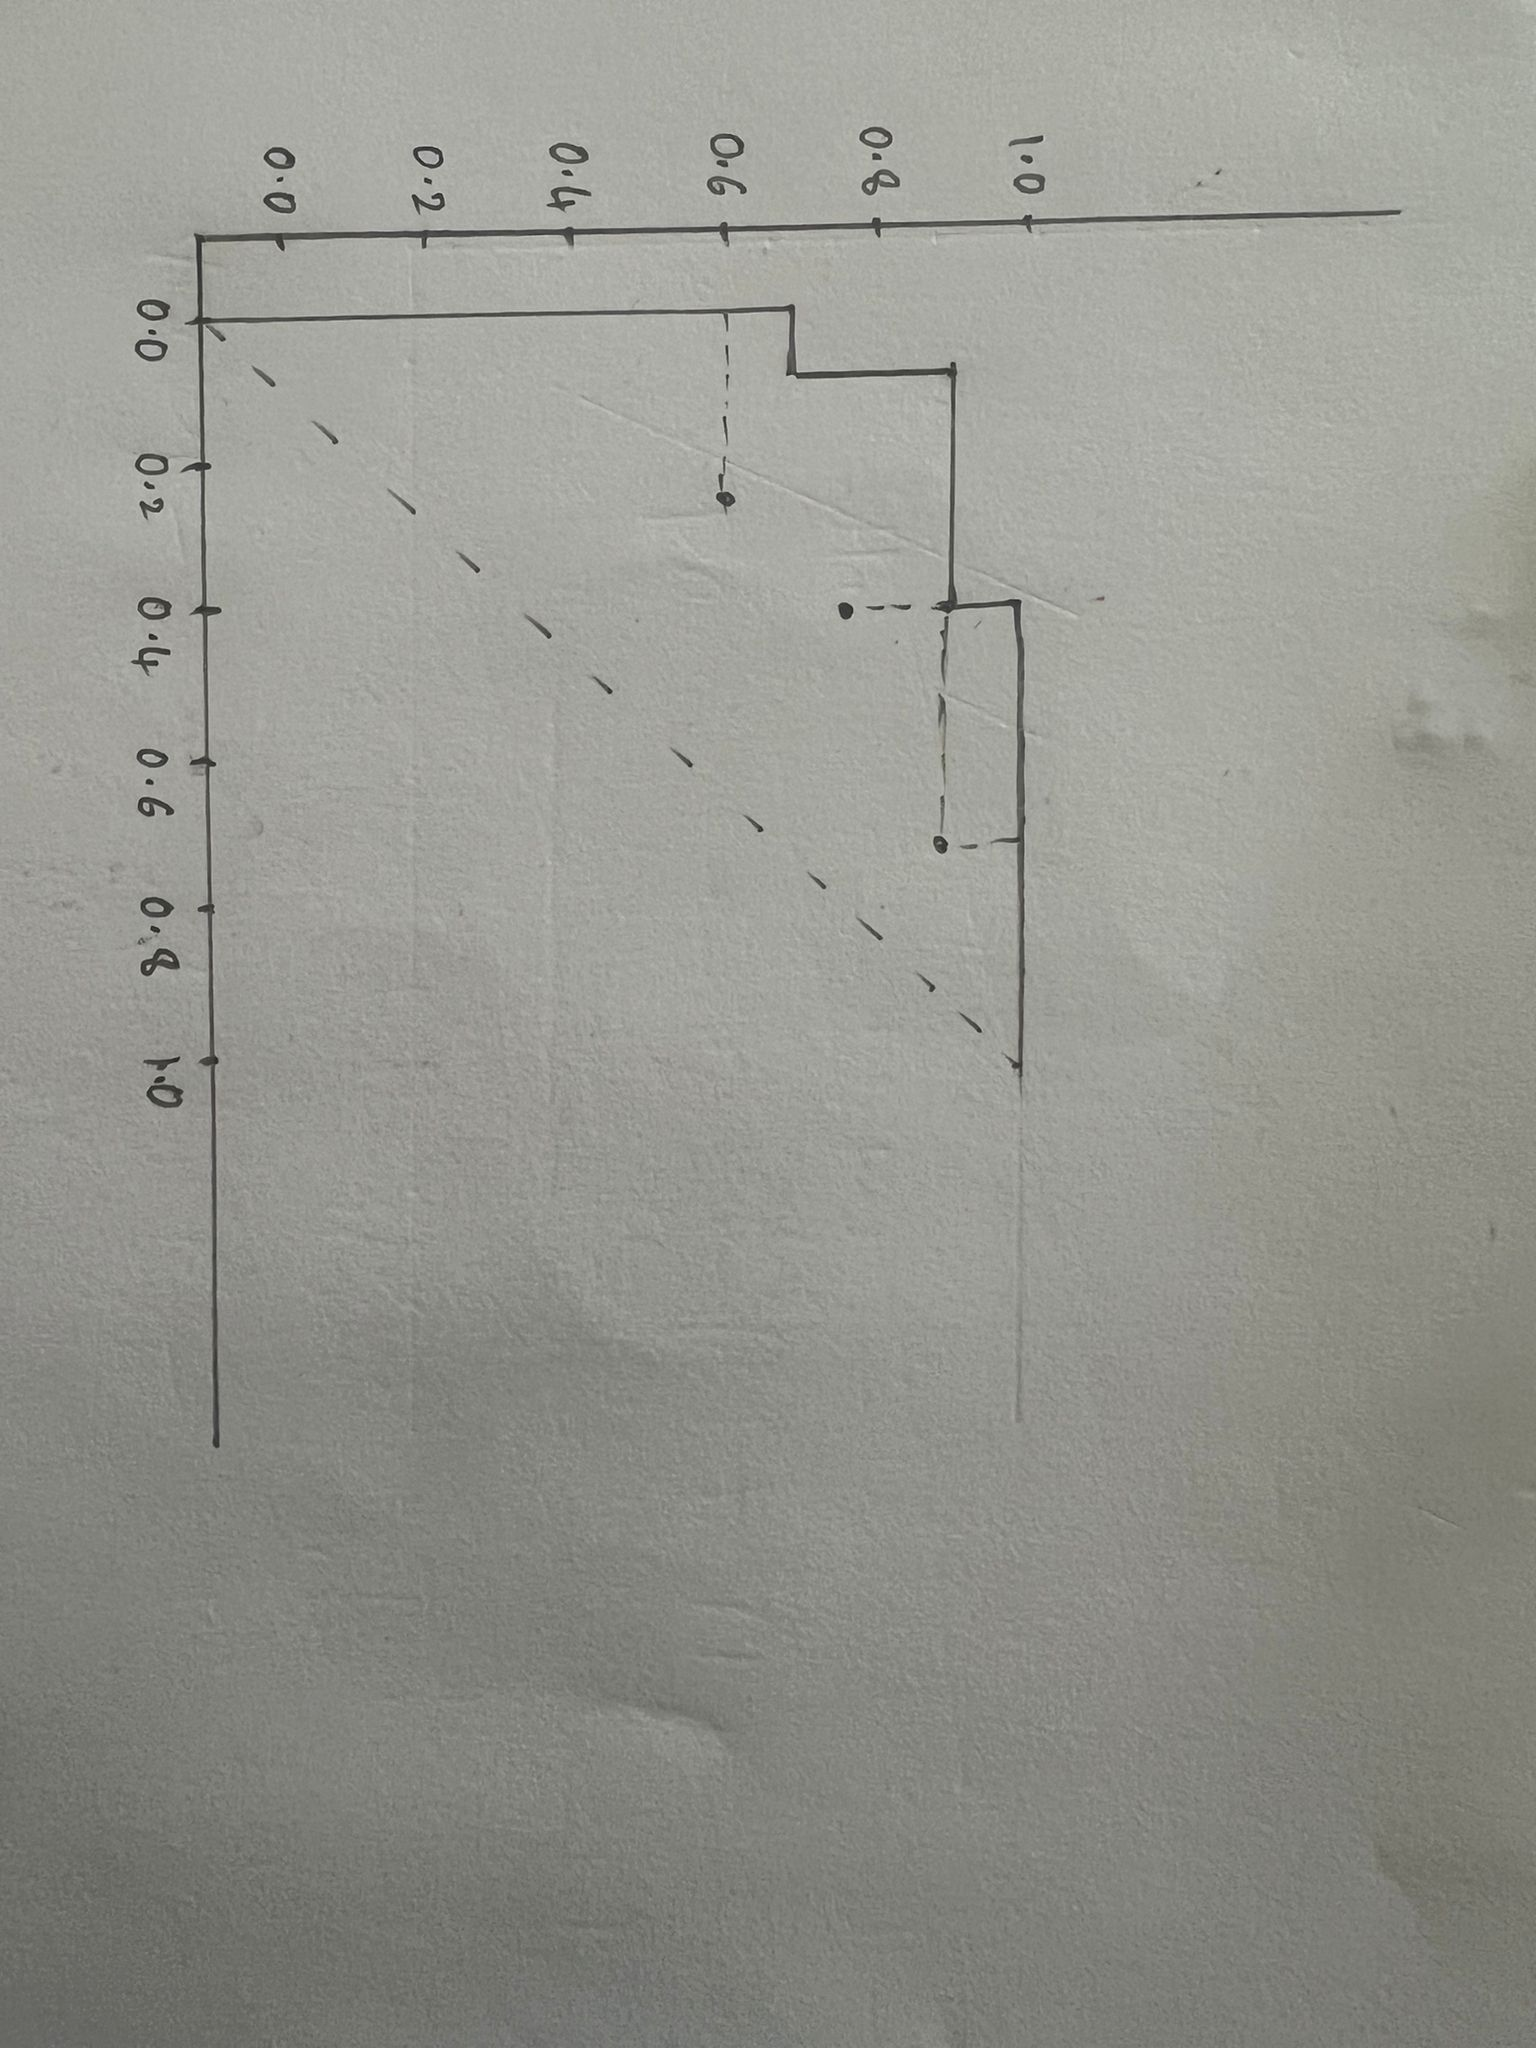

In [87]:
model2_pred=['bad','good','bad','bad','good','good','good','good','good','good','good','bad','good','bad','bad','bad','good',
        'good','bad','bad','good','bad','bad','good','good','bad','bad','good','bad','bad']

outcome2=['TP','FN','FP','TP','FN',
          'FN','FN','TN','FN','FN',
          'FN','FP','TN','FP','FP',
          'FP','FN','FN','TP','TP',
          'FN','FP','TP','FN','FN',
          'FP','FP','TN','FP','FP']


Score2=[0.230,0.859,0.154,0.325,0.952,0.900,0.501,0.650,0.940,0.806,0.507,0.251,0.597,0.376,0.285,0.421,0.842,0.891,0.481,
       0.340,0.962,0.238,0.362,0.848,0.915,0.096,0.319,0.740,0.211,0.152]

In [88]:
df=pd.DataFrame(Target,columns=['Target'])
df['Score'] = Score2
df['model2_pred'] = model2_pred

In [89]:
df2=df.sort_values('Score')
df2['outcome'] = outcome2

In [90]:
df2.head()

,Target,Score,model2_pred,outcome
25,good,0.096,bad,TP
29,good,0.152,bad,FN
2,good,0.154,bad,FP
28,good,0.211,bad,TP
0,bad,0.230,bad,FN


In [91]:
df2.outcome.value_counts()

FN    12
FP    10
TP     5
TN     3
Name: outcome, dtype: int64

In [92]:
#From the above cell
FN = 10
TN = 5
TP = 3
FP = 12
TPR2=TP/(TP+FN)
FPR2=FP/(TN+FP)

In [93]:
print('True positive rate for model 1',round(TPR2,4))
print('False positive rate for model 1',round(FPR2,4))
print('So the co-ordinates for the point for model 1 is (',round(TPR2,4),',',round(FPR2,4),")")

True positive rate for model 1 0.2308
False positive rate for model 1 0.7059
So the co-ordinates for the point for model 1 is ( 0.2308 , 0.7059 )


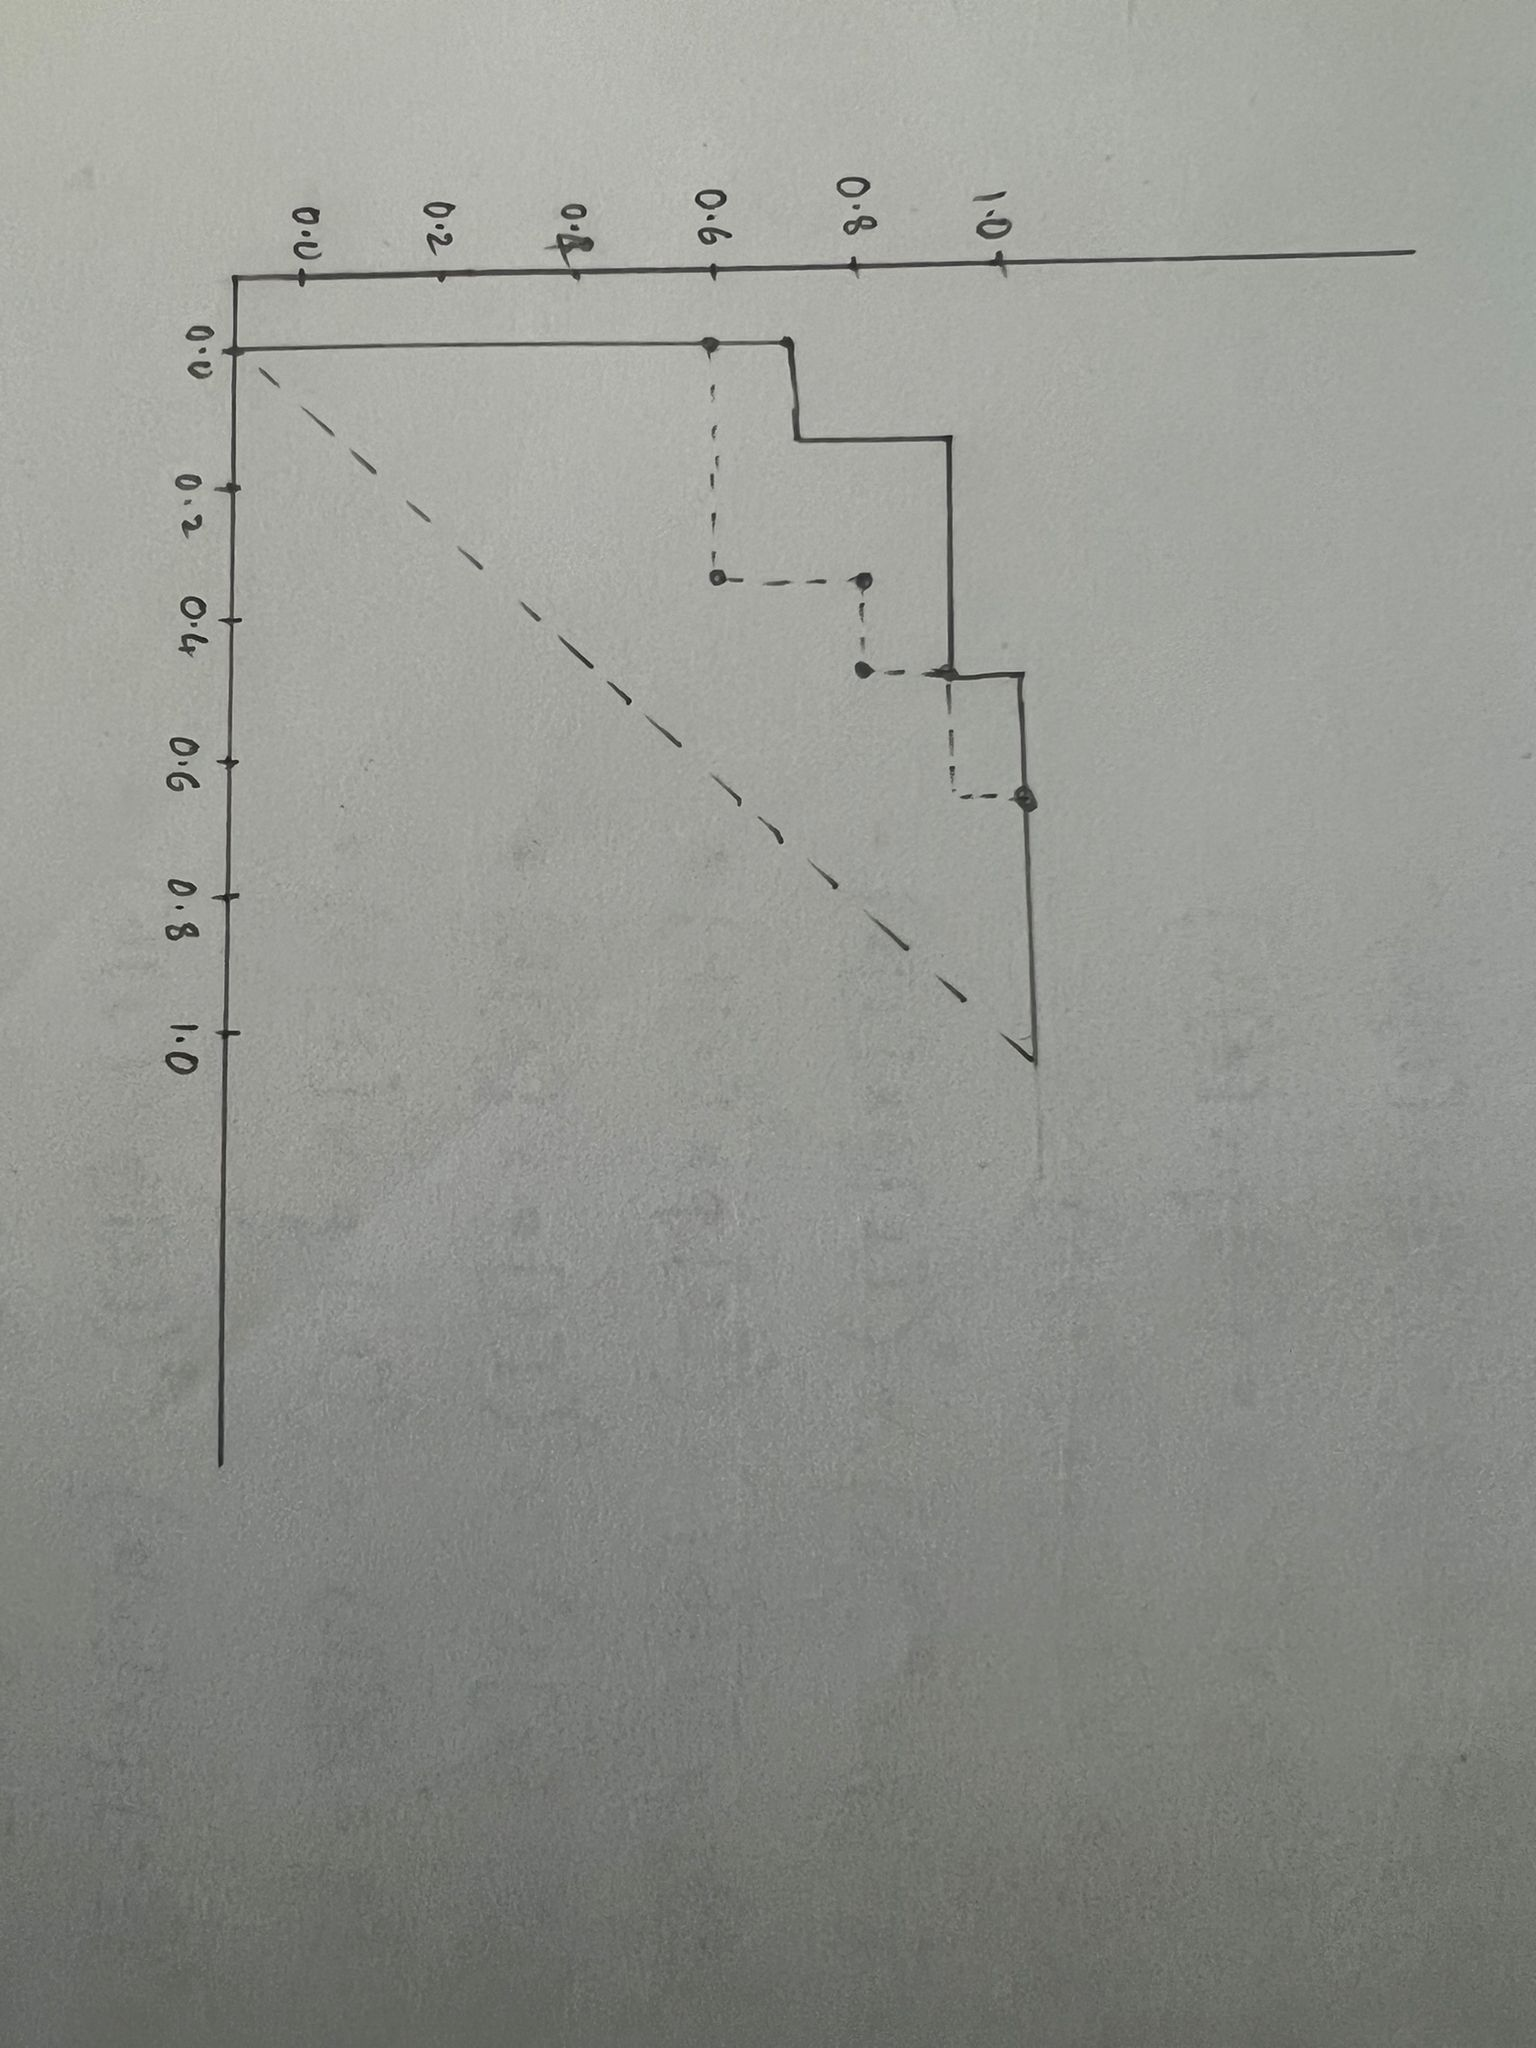

### b. The area under the ROC curve (AUC) for Model 1 is 0.955 and for Model 2 is 0.851. Which model is performing best?

We can infer that Model 1 performs better at this task based on the higher AUC. There is no operational point (or threshold value) at which Model 2 is superior because the ROC curve for Model 1 dominates the curve for Model 2 (i.e., it is always greater).

### c. Based on the AUC values for Model 1 and Model 2, calculate the Gini coefficient for each model.

Gini coefficient can be calculated as follows: **(2*ROC(AUC Value))-1**

In [94]:
gini_mdl1=(2*0.955)-1
gini_mdl2=(2*0.851)-1

In [95]:
print('Gini Coefficient for Model_1 is',round(gini_mdl1,4))
print('Gini Coefficient for Model_2 is',round(gini_mdl2,4))

Gini Coefficient for Model_1 is 0.91
Gini Coefficient for Model_2 is 0.702


### (25%, coding assignment) What is ordinary least square (OLS) method to obtain linear regression model weights? See  https://en.wikipedia.org/wiki/Ordinary_least_squares. Can you implement this OLS method by Python to predict following dataset (https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw)? 

In [96]:
Hours=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
Score=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]

In [97]:
data_df=pd.DataFrame(Hours,columns=['Hours'])
data_df['Score'] = Score

In [98]:
data_df.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [99]:
x=data_df['Hours']
y=data_df['Score']

In [100]:
model=sm.OLS(y,x)

In [101]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                    6.10e-26
Time:                        23:35:25   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Definition and my understanding of various metrics:

R-squared - statistical measure of how well the regression line approximates the real data points.

Adj. R-squared - actually adjusts the statistics based on the number of independent variables present.

F-statistic - the ratio of mean squared error of the model to the mean squared error of residuals.

AIC - estimates the relative quality of statistical models for a given dataset.

BIC - used as a criterion for model selection among a finite set of models.

coef - the coefficients of the independent variables and the constant term in the equation.

std err - the basic standard error of the estimate of the coefficient.

t - a measure of how statistically significant the coefficient is.

P > |t| - the null-hypothesis that the coefficient = 0 is true.

In [102]:
model.fit().params

Hours    10.174257
dtype: float64

In [103]:
model.fit().pvalues

Hours    6.101002e-26
dtype: float64